In [1]:
import json
import os 
from PIL import Image
import cv2 as cv2
import numpy as np
import math
import imutils
import random

import matplotlib.pyplot as plt
%matplotlib inline

%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [2]:

import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras import backend as K

# This cell contains different functions used for different purposes.

def get_session():
    """ Construct a modified tf session.
    """
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)


def classify(im,model):
    """Classifies an image (np array or keras array)
        See here for difference:
        https://stackoverflow.com/questions/53718409/numpy-array-vs-img-to-array
    Parameters:
    im: numpy array
        The image to classify
    Returns:
    classe[0] : int
        in [0, 1, 2] corresponding to ['godet-vide', 'pet-clair', 'pet-fonce']
    or 
    in [0, 1, 2, 3] corresponding to ['godet-vide', 'pe-hd-opaque','pet-clair', 'pet-fonce']
    
    depending on which trained model is used.
   """

    print('classifying')
    classe = model.predict(im)
    #print(classe)
    classe =classe.argmax(axis = 1) #taking index of the maximum %
    #print(classe)
    return classe[0]

def angle_difference(x, y):
    """
    Calculate minimum difference between two angles.
    """
    return 180 - abs(abs(x - y) - 180)


def angle_error(y_true, y_pred):
    """
    Calculate the mean diference between the true angles
    and the predicted angles. Each angle is represented
    as a binary vector.
    """
    diff = angle_difference(K.argmax(y_true), K.argmax(y_pred))
    print(K.argmax(y_true), K.argmax(y_pred))
    return K.mean(K.cast(K.abs(diff), K.floatx()))


dcode ={'0': 0, '1': 1, '10': 2, '100': 3, '101': 4, '102': 5, '103': 6, '104': 7, '105': 8, '106': 9, '107': 10, '108': 11, '109': 12, '11': 13, '110': 14, '111': 15, '112': 16, '113': 17, '114': 18, '115': 19, '116': 20, '117': 21, '118': 22, '119': 23, '12': 24, '120': 25, '121': 26, '122': 27, '123': 28, '124': 29, '125': 30, '126': 31, '127': 32, '128': 33, '129': 34, '13': 35, '130': 36, '131': 37, '132': 38, '133': 39, '134': 40, '135': 41, '136': 42, '137': 43, '138': 44, '139': 45, '14': 46, '140': 47, '141': 48, '142': 49, '143': 50, '144': 51, '145': 52, '146': 53, '147': 54, '148': 55, '149': 56, '15': 57, '150': 58, '151': 59, '152': 60, '153': 61, '154': 62, '155': 63, '156': 64, '157': 65, '158': 66, '159': 67, '16': 68, '160': 69, '161': 70, '162': 71, '163': 72, '164': 73, '165': 74, '166': 75, '167': 76, '168': 77, '169': 78, '17': 79, '170': 80, '171': 81, '172': 82, '173': 83, '174': 84, '175': 85, '176': 86, '177': 87, '178': 88, '179': 89, '18': 90, '180': 91, '181': 92, '182': 93, '183': 94, '184': 95, '185': 96, '186': 97, '187': 98, '188': 99, '189': 100, '19': 101, '190': 102, '191': 103, '192': 104, '193': 105, '194': 106, '195': 107, '196': 108, '197': 109, '198': 110, '199': 111, '2': 112, '20': 113, '200': 114, '201': 115, '202': 116, '203': 117, '204': 118, '205': 119, '206': 120, '207': 121, '208': 122, '209': 123, '21': 124, '210': 125, '211': 126, '212': 127, '213': 128, '214': 129, '215': 130, '216': 131, '217': 132, '218': 133, '219': 134, '22': 135, '220': 136, '221': 137, '222': 138, '223': 139, '224': 140, '225': 141, '226': 142, '227': 143, '228': 144, '229': 145, '23': 146, '230': 147, '231': 148, '232': 149, '233': 150, '234': 151, '235': 152, '236': 153, '237': 154, '238': 155, '239': 156, '24': 157, '240': 158, '241': 159, '242': 160, '243': 161, '244': 162, '245': 163, '246': 164, '247': 165, '248': 166, '249': 167, '25': 168, '250': 169, '251': 170, '252': 171, '253': 172, '254': 173, '255': 174, '256': 175, '257': 176, '258': 177, '259': 178, '26': 179, '260': 180, '261': 181, '262': 182, '263': 183, '264': 184, '265': 185, '266': 186, '267': 187, '268': 188, '269': 189, '27': 190, '270': 191, '271': 192, '272': 193, '273': 194, '274': 195, '275': 196, '276': 197, '277': 198, '278': 199, '279': 200, '28': 201, '280': 202, '281': 203, '282': 204, '283': 205, '284': 206, '285': 207, '286': 208, '287': 209, '288': 210, '289': 211, '29': 212, '290': 213, '291': 214, '292': 215, '293': 216, '294': 217, '295': 218, '296': 219, '297': 220, '298': 221, '299': 222, '3': 223, '30': 224, '300': 225, '301': 226, '302': 227, '303': 228, '304': 229, '305': 230, '306': 231, '307': 232, '308': 233, '309': 234, '31': 235, '310': 236, '311': 237, '312': 238, '313': 239, '314': 240, '315': 241, '316': 242, '317': 243, '318': 244, '319': 245, '32': 246, '320': 247, '321': 248, '322': 249, '323': 250, '324': 251, '325': 252, '326': 253, '327': 254, '328': 255, '329': 256, '33': 257, '330': 258, '331': 259, '332': 260, '333': 261, '334': 262, '335': 263, '336': 264, '337': 265, '338': 266, '339': 267, '34': 268, '340': 269, '341': 270, '342': 271, '343': 272, '344': 273, '345': 274, '346': 275, '347': 276, '348': 277, '349': 278, '35': 279, '350': 280, '351': 281, '352': 282, '353': 283, '354': 284, '355': 285, '356': 286, '357': 287, '358': 288, '359': 289, '36': 290, '37': 291, '38': 292, '39': 293, '4': 294, '40': 295, '41': 296, '42': 297, '43': 298, '44': 299, '45': 300, '46': 301, '47': 302, '48': 303, '49': 304, '5': 305, '50': 306, '51': 307, '52': 308, '53': 309, '54': 310, '55': 311, '56': 312, '57': 313, '58': 314, '59': 315, '6': 316, '60': 317, '61': 318, '62': 319, '63': 320, '64': 321, '65': 322, '66': 323, '67': 324, '68': 325, '69': 326, '7': 327, '70': 328, '71': 329, '72': 330, '73': 331, '74': 332, '75': 333, '76': 334, '77': 335, '78': 336, '79': 337, '8': 338, '80': 339, '81': 340, '82': 341, '83': 342, '84': 343, '85': 344, '86': 345, '87': 346, '88': 347, '89': 348, '9': 349, '90': 350, '91': 351, '92': 352, '93': 353, '94': 354, '95': 355, '96': 356, '97': 357, '98': 358, '99': 359}


# Fixes an issue with CudNN on the macchiato. ( Because RTX 2080, new gen)
keras.backend.tensorflow_backend.set_session(get_session())


Using TensorFlow backend.


"\n\ndef main():\n\n    HEIGHT = 224\n    WIDTH = 224\n\n    model = load_model('vide_petc_petf-vgg16-20190423141400.h5')\n\n    im_path = './dataset/wsEN4iv2SliFUuYNXIM-5Q_0b9FT9bgTKSFE4NaMtMCwA_320x200.png'\n\n    img = image.load_img(im_path, target_size=(HEIGHT, WIDTH)) #resize\n    img = image.img_to_array(img)\n    img = np.expand_dims(img, axis=0)# correct shape for classification\n\n    print(classify(img,model))\n\n"

In [3]:
# This cell loads the model 

from keras.models import load_model

model = load_model('./models/rotnet_step3_resnet50_20190606005100.hdf5',custom_objects={'angle_error': angle_error})



Instructions for updating:
Colocations handled automatically by placer.
Tensor("metrics/angle_error/ArgMax_2:0", shape=(?,), dtype=int64) Tensor("metrics/angle_error/ArgMax_3:0", shape=(?,), dtype=int64)
Instructions for updating:
Use tf.cast instead.


['FULL-2019-05-16-141629.png', 'Image__2019-05-16__14-14-59.png', 'FULL-2019-04-26-144500.png', 'FULL-2019-05-16-143501.png', 'FULL-2019-04-26-144724.png', 'FULL-2019-04-26-153611.png', 'FULL-2019-04-26-140123.png', 'FULL-2019-04-26-121832.png', 'FULL-2019-05-16-150646.png', 'FULL-2019-05-16-142730.png', 'FULL-2019-05-16-143925.png', 'FULL-2019-04-26-160938.png', 'FULL-2019-04-26-144803.png', 'FULL-2019-05-16-145625.png', 'FULL-2019-04-26-153332.png', 'FULL-2019-04-26-134020.png', 'FULL-2019-04-26-140937.png', 'FULL-2019-05-16-143218.png', 'FULL-2019-05-16-150419.png', 'FULL-2019-05-16-150042.png', 'FULL-2019-05-16-151842.png', 'Image__2019-05-16__11-11-13.png', 'FULL-2019-04-26-150916.png', 'FULL-2019-04-26-152959.png', 'FULL-2019-05-16-150015.png', 'FULL-2019-05-16-145239.png', 'FULL-2019-04-26-145917.png', 'FULL-2019-05-16-151717.png', 'FULL-2019-05-16-145009.png', 'FULL-2019-04-26-161409.png', 'FULL-2019-04-26-154943.png', 'FULL-2019-04-26-154257.png', 'FULL-2019-04-26-151235.png',

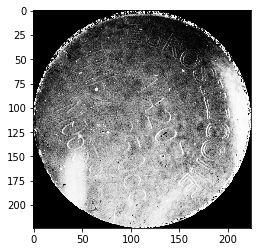

(1, 224, 224, 3)
classifying
Time =  0.053933143615722656
Classe =  287
Angle = -287


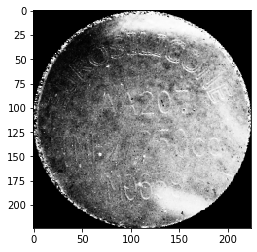

finito
Image__2019-05-16__14-14-59.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


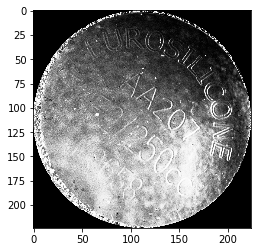

(1, 224, 224, 3)
classifying
Time =  0.05233883857727051
Classe =  320
Angle = -320


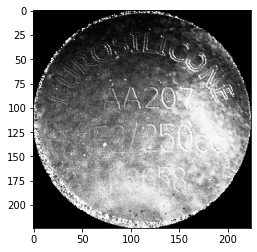

finito
FULL-2019-04-26-144500.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


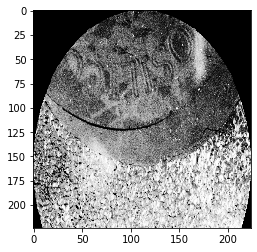

(1, 224, 224, 3)
classifying
Time =  0.05423164367675781
Classe =  174
Angle = -174


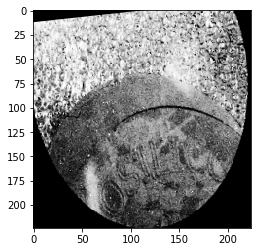

finito
FULL-2019-05-16-143501.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


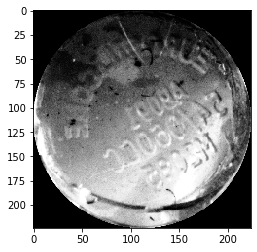

(1, 224, 224, 3)
classifying
Time =  0.05327796936035156
Classe =  37
Angle = -37


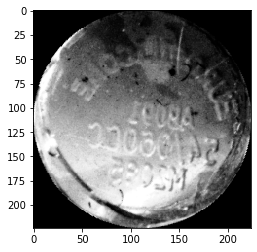

finito
FULL-2019-04-26-144724.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


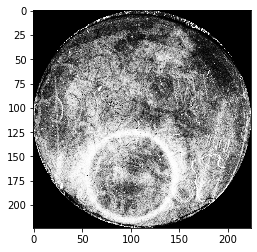

(1, 224, 224, 3)
classifying
Time =  0.053684234619140625
Classe =  179
Angle = -179


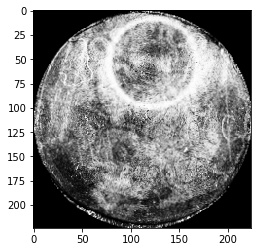

finito
FULL-2019-04-26-153611.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


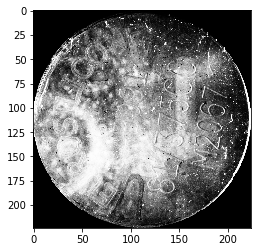

(1, 224, 224, 3)
classifying
Time =  0.055577993392944336
Classe =  89
Angle = -89


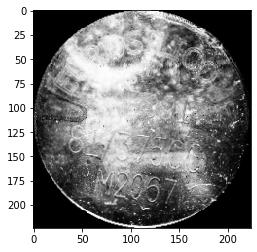

finito
FULL-2019-04-26-140123.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


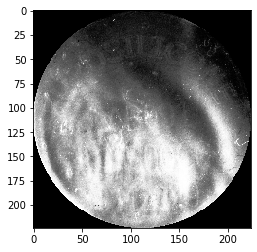

(1, 224, 224, 3)
classifying
Time =  0.05292844772338867
Classe =  8
Angle = -8


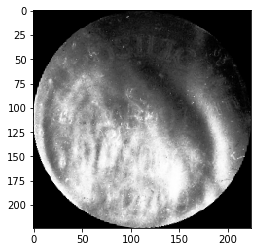

finito
FULL-2019-04-26-121832.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


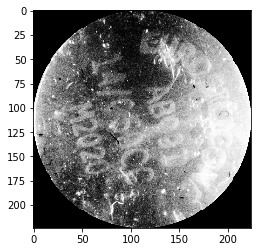

(1, 224, 224, 3)
classifying
Time =  0.05228734016418457
Classe =  283
Angle = -283


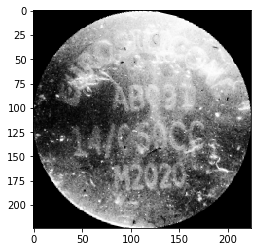

finito
FULL-2019-05-16-150646.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


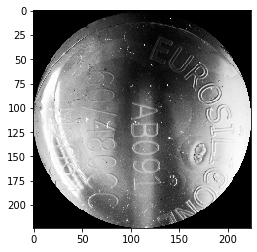

(1, 224, 224, 3)
classifying
Time =  0.05456042289733887
Classe =  274
Angle = -274


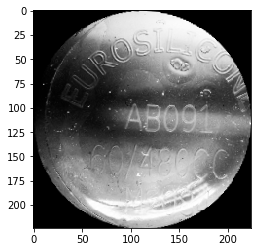

finito
FULL-2019-05-16-142730.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


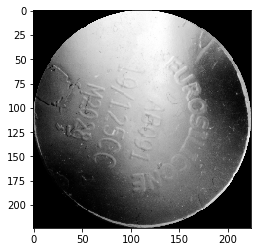

(1, 224, 224, 3)
classifying
Time =  0.05286836624145508
Classe =  255
Angle = -255


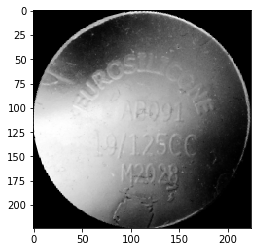

finito
FULL-2019-05-16-143925.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


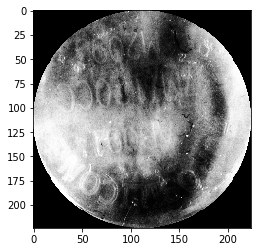

(1, 224, 224, 3)
classifying
Time =  0.0537409782409668
Classe =  186
Angle = -186


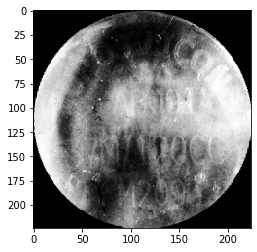

finito
FULL-2019-04-26-160938.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


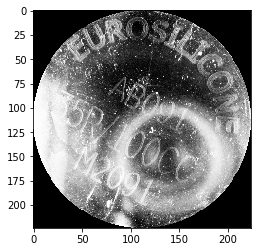

(1, 224, 224, 3)
classifying
Time =  0.05347609519958496
Classe =  340
Angle = -340


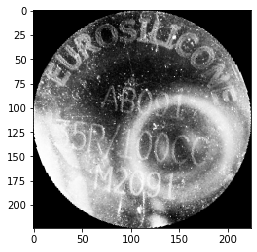

finito
FULL-2019-04-26-144803.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


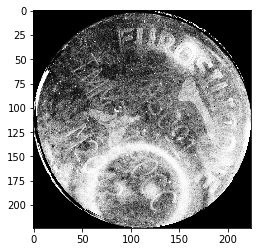

(1, 224, 224, 3)
classifying
Time =  0.05601310729980469
Classe =  296
Angle = -296


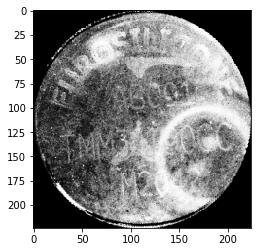

finito
FULL-2019-05-16-145625.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


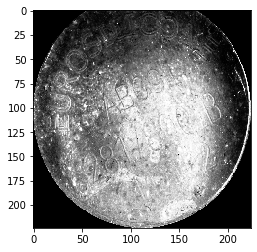

(1, 224, 224, 3)
classifying
Time =  0.052176475524902344
Classe =  21
Angle = -21


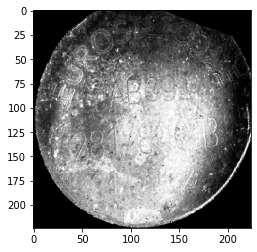

finito
FULL-2019-04-26-153332.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


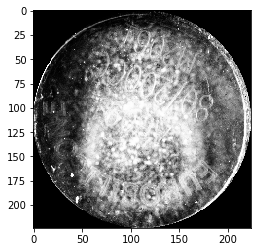

(1, 224, 224, 3)
classifying
Time =  0.0534358024597168
Classe =  160
Angle = -160


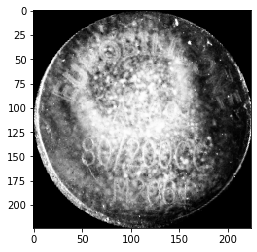

finito
FULL-2019-04-26-134020.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


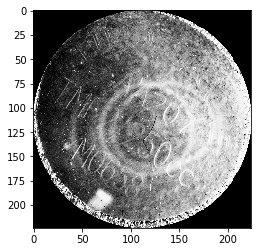

(1, 224, 224, 3)
classifying
Time =  0.05330252647399902
Classe =  330
Angle = -330


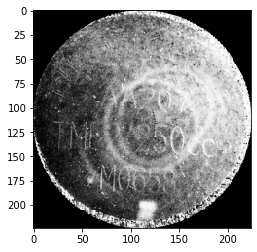

finito
FULL-2019-04-26-140937.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


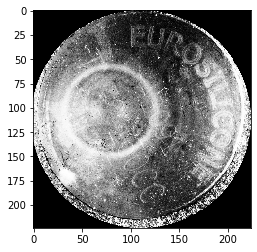

(1, 224, 224, 3)
classifying
Time =  0.05275392532348633
Classe =  294
Angle = -294


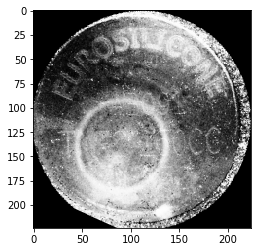

finito
FULL-2019-05-16-143218.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


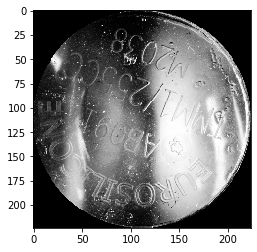

(1, 224, 224, 3)
classifying
Time =  0.0532228946685791
Classe =  158
Angle = -158


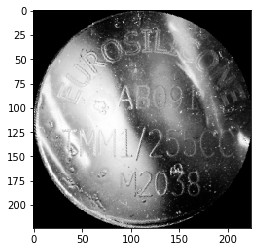

finito
FULL-2019-05-16-150419.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


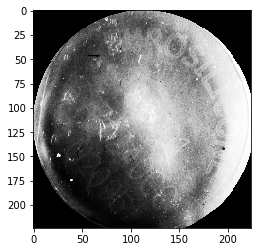

(1, 224, 224, 3)
classifying
Time =  0.05451035499572754
Classe =  304
Angle = -304


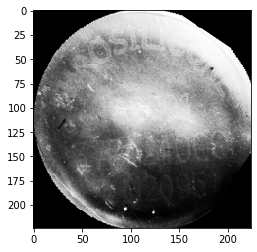

finito
FULL-2019-05-16-150042.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


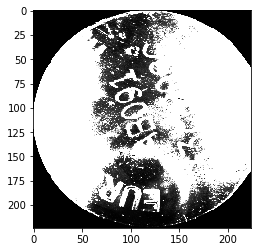

(1, 224, 224, 3)
classifying
Time =  0.0540921688079834
Classe =  112
Angle = -112


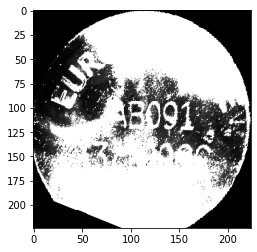

finito
FULL-2019-05-16-151842.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


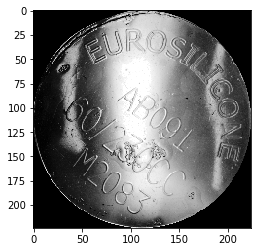

(1, 224, 224, 3)
classifying
Time =  0.05294394493103027
Classe =  324
Angle = -324


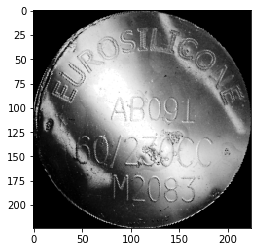

finito
Image__2019-05-16__11-11-13.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


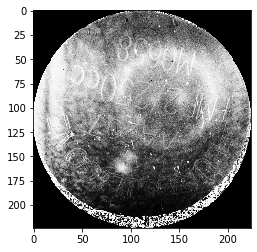

(1, 224, 224, 3)
classifying
Time =  0.05481386184692383
Classe =  169
Angle = -169


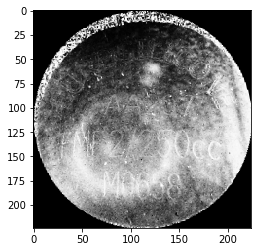

finito
FULL-2019-04-26-150916.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


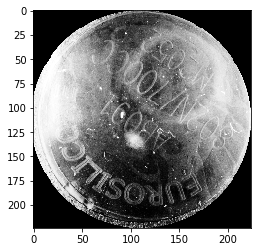

(1, 224, 224, 3)
classifying
Time =  0.05357003211975098
Classe =  149
Angle = -149


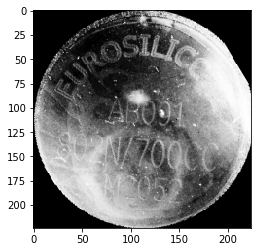

finito
FULL-2019-04-26-152959.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


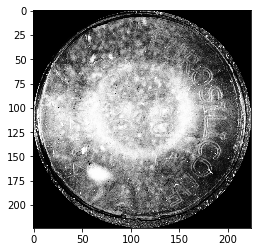

(1, 224, 224, 3)
classifying
Time =  0.05233001708984375
Classe =  277
Angle = -277


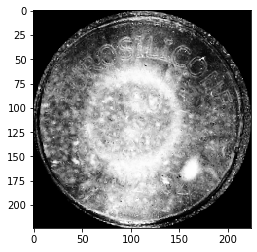

finito
FULL-2019-05-16-150015.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


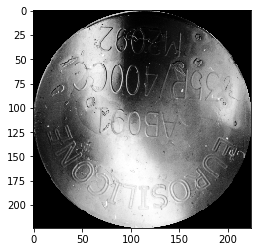

(1, 224, 224, 3)
classifying
Time =  0.051535844802856445
Classe =  177
Angle = -177


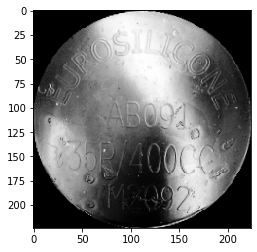

finito
FULL-2019-05-16-145239.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


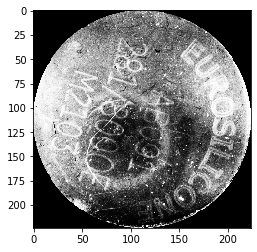

(1, 224, 224, 3)
classifying
Time =  0.052498817443847656
Classe =  255
Angle = -255


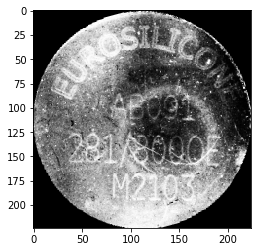

finito
FULL-2019-04-26-145917.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


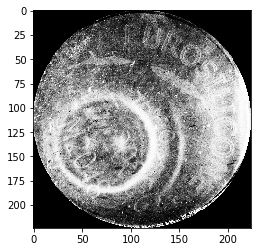

(1, 224, 224, 3)
classifying
Time =  0.05338144302368164
Classe =  297
Angle = -297


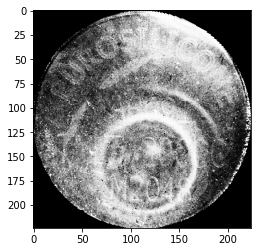

finito
FULL-2019-05-16-151717.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


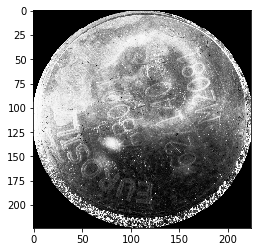

(1, 224, 224, 3)
classifying
Time =  0.05335116386413574
Classe =  110
Angle = -110


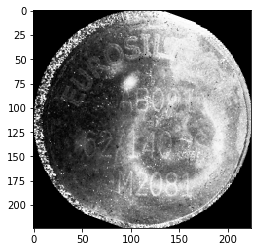

finito
FULL-2019-05-16-145009.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


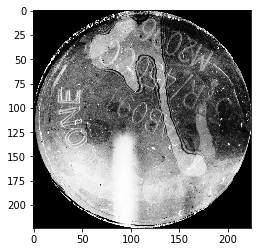

(1, 224, 224, 3)
classifying
Time =  0.054787397384643555
Classe =  149
Angle = -149


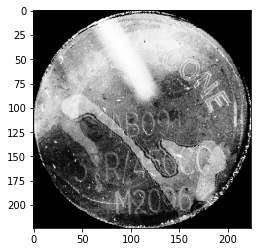

finito
FULL-2019-04-26-161409.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


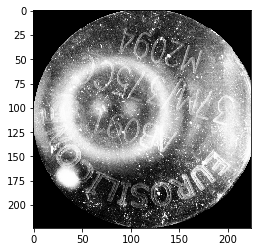

(1, 224, 224, 3)
classifying
Time =  0.05200362205505371
Classe =  163
Angle = -163


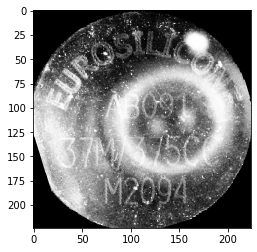

finito
FULL-2019-04-26-154943.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


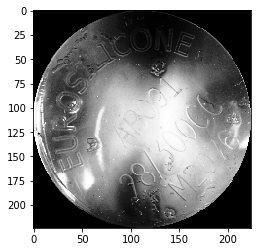

(1, 224, 224, 3)
classifying
Time =  0.05463004112243652
Classe =  47
Angle = -47


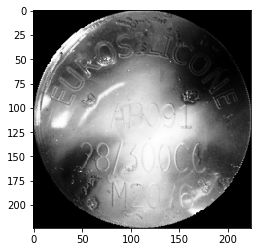

finito
FULL-2019-04-26-154257.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


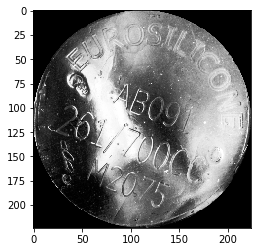

(1, 224, 224, 3)
classifying
Time =  0.05263996124267578
Classe =  339
Angle = -339


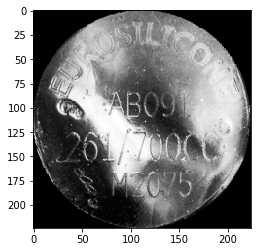

finito
FULL-2019-04-26-151235.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


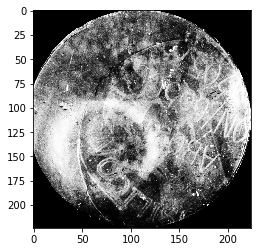

(1, 224, 224, 3)
classifying
Time =  0.05247783660888672
Classe =  294
Angle = -294


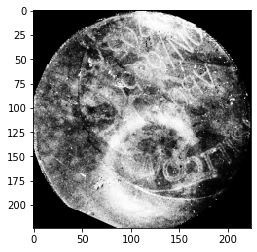

finito
FULL-2019-04-26-140104.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


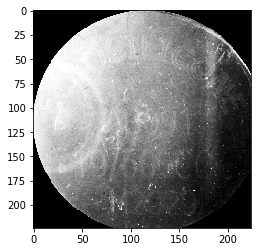

(1, 224, 224, 3)
classifying
Time =  0.05345320701599121
Classe =  0
Angle = 0


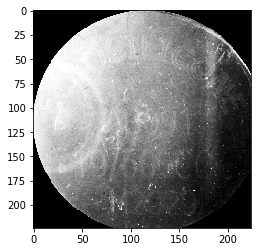

finito
FULL-2019-04-26-160236.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


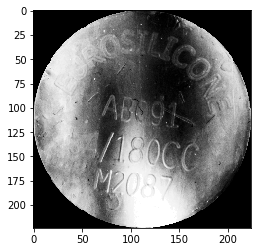

(1, 224, 224, 3)
classifying
Time =  0.05335235595703125
Classe =  355
Angle = -355


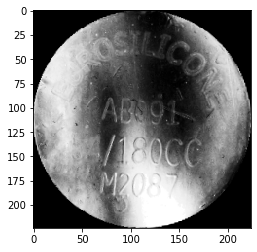

finito
FULL-2019-05-16-144802.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


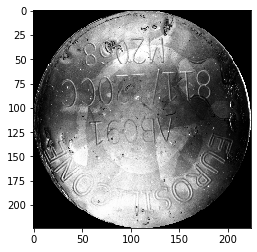

(1, 224, 224, 3)
classifying
Time =  0.05390453338623047
Classe =  179
Angle = -179


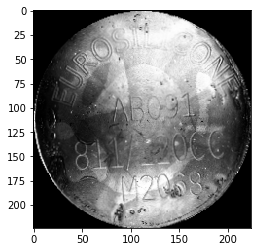

finito
FULL-2019-04-26-144746.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


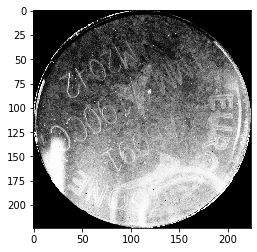

(1, 224, 224, 3)
classifying
Time =  0.05236935615539551
Classe =  213
Angle = -213


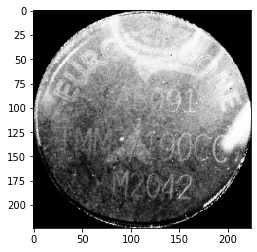

finito
FULL-2019-04-26-155958.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


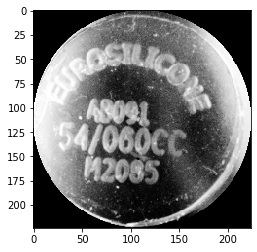

(1, 224, 224, 3)
classifying
Time =  0.05208325386047363
Classe =  1
Angle = -1


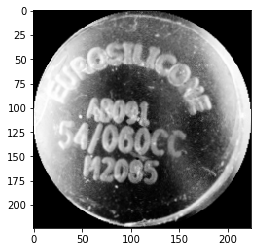

finito
FULL-2019-04-26-154701.png
(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>


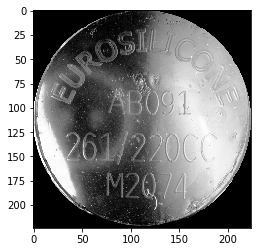

(1, 224, 224, 3)
classifying
Time =  0.05418562889099121
Classe =  1
Angle = -1


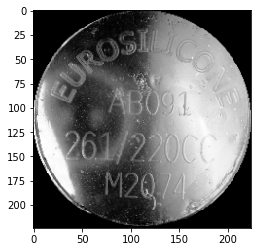

finito


In [52]:
# This cell is used to test the angle correction on our dataset. 
# You should also use it to create the dataset for the next step by uncommenting the last lines.

#IMAGES_PATH = '../dataset/step3_orientationfixer/sply/img_test/img/'
IMAGES_PATH = '../dataset/ds_step3_orientation_fixer/img_test/img/'
#IMAGES_PATH = '../dataset/step3_orientationfixer/sply/img_test/vrac/062/'
images = os.listdir(IMAGES_PATH)
print(images)
for index, im in enumerate(images):
    print('============================================')
    print(im)
    HEIGHT = 224
    WIDTH = 224

    image = cv2.imread(IMAGES_PATH+im,0)
    image = cv2.resize(image,(HEIGHT,WIDTH))
    #image = imutils.rotate(image,200)
    print(image.shape)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    print(image.shape)
    
    
    print(type(image))
    
    image = image/255
    #print(image[100][1:5])
    
    plt.imshow(image)
    plt.show()

    image4 = np.expand_dims(image, axis=0)# correct shape for classification
    print(image4.shape)
    
    start = time. time()
    classe = classify(image4,model)
    end = time. time()
    print('Time = ',end - start)
    
    print('Classe = ', classe)
    angle_corr = -1*classe
    print('Angle =',angle_corr)

    img3 = imutils.rotate(image,angle_corr)
    plt.imshow(img3)
    plt.show()
    '''
        output_dir = dir_final #+ str(k) + '/'
        print(output_dir)

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)




        cv2.imwrite( output_dir+im, img3 )

    print('image ', k, 'done')
    """
    '''        
    print('finito')

In [42]:
# All the cells below are used to compute different metrics to evaluate the model.


DATA_DIR = '../dataset/ds_step3_orientation_fixer/img_val/img_evaluate/'

# Creating the generator of our images
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 1,
    class_mode = 'categorical',
    shuffle = False)

Found 52 images belonging to 47 classes.


In [43]:
# Computing predictions on the generator
predictions = model.predict_generator(
        test_generator,
        val_samples=len(test_generator),
    )

/home/numericube/virtualenvs/abdeep/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/numericube/virtualenvs/abdeep/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras_pre..., steps=52)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:

# You only need to change the variable "classes" wich depends of the test dataset you are testing. 
# If you used the angle_correction.ipynb to create the img_evaluate folder, you can copy classes_str (which is printed) in classes.


index=0
k=0
diff_mean=0
diff_mean_noextreme = 0
std = 0
nb_im = len(predictions)
for index, pred in enumerate(predictions):

    print("================================")
    print(index)
    classe = pred.argmax(axis=0)

    #works if 360 classes present
    #true_classe = test_generator[index][1].argmax(axis = 1)
    true_classenb = test_generator[index][1].argmax(axis = 1)
    #print('indice =', test_generator[index][1])
    classes = np.sort([18,72,87,83,319,272,355,184,34,160,317,57,118,139,266,51,10,295,44,288,201,192,100,265,240,125,122,203,277,28,99,188,311,326,59,191,197,95,140,98,9,55,302,195,242,321,0])
    true_classe = classes[true_classenb[0]]
    moy = true_classe
    diff = angle_difference(true_classe,classe)
    print("diff=",diff)
    if diff<20:
        #print(pred)
        k += 1
        diff_mean_noextreme += diff
    diff_mean += diff
    std += diff**2
    print('True class = ', true_classe)
    print('Predicted class = ', classe)
print("Diff_mean = ", diff_mean/nb_im)  
print("Diff_mean_noextreme = ", diff_mean_noextreme/nb_im)
print("STD = ", np.sqrt(std/nb_im))
print('K =',k)

0
diff= 1
True class =  0
Predicted class =  359
1
diff= 114
True class =  9
Predicted class =  255
2
diff= 1
True class =  10
Predicted class =  9
3
diff= 3
True class =  18
Predicted class =  15
4
diff= 5
True class =  18
Predicted class =  13
5
diff= 3
True class =  28
Predicted class =  25
6
diff= 6
True class =  34
Predicted class =  28
7
diff= 4
True class =  44
Predicted class =  48
8
diff= 10
True class =  51
Predicted class =  61
9
diff= 8
True class =  55
Predicted class =  63
10
diff= 1
True class =  57
Predicted class =  58
11
diff= 7
True class =  59
Predicted class =  66
12
diff= 0
True class =  72
Predicted class =  72
13
diff= 7
True class =  83
Predicted class =  90
14
diff= 4
True class =  87
Predicted class =  91
15
diff= 4
True class =  95
Predicted class =  91
16
diff= 8
True class =  98
Predicted class =  106
17
diff= 4
True class =  99
Predicted class =  103
18
diff= 48
True class =  100
Predicted class =  148
19
diff= 1
True class =  118
Predicted class =  117
2

In [38]:
print(2**4)

16
